In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset

df=pd.read_excel("social_data.xlsx")

In [3]:
#Retrieving information of the above dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   float64       
 5   Total Engagements  3479 non-null   float64       
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 190.4+ KB


- <b>Published Date:</b> This column likely represents the date and time when the campaign content was published or released.
- <b>Account:</b> This column likely represents the account associated with the campaign. It could be the name of a social media account, company, or individual running the campaign.
- <b>Account Type:</b> This column likely categorizes the type or category of the account. It could indicate  platform or industry.
- <b>Campaign Name:</b> This column likely contains the name or identifier of the marketing campaign. It helps differentiate between different campaigns or promotional activities.
- <b>Total Impressions:</b> This column likely represents the total number of times the campaign content was displayed or seen by users. Impressions typically refer to the number of times an advertisement or content appears on a user's screen.
- <b>Total Engagements:</b> This column likely represents the total number of interactions or engagements with the campaign content. Engagements could include likes, comments, shares, clicks, or any other form of user interaction depending on the platform or medium.
- <b>Media Type:</b> This column likely indicates the type of media used in the campaign, such as text, image, video, or a combination thereof. It helps identify the format or medium of the promotional content.

In [4]:
# Displaying top 5 rows of data

df.head(5)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video


### Check the data types

In [5]:
df.dtypes

Published Date       datetime64[ns]
Account                      object
Account Type                 object
Campaign Name                object
Total Impressions           float64
Total Engagements           float64
Media Type                   object
dtype: object

In [6]:
print("Number of rows ",df.shape[0])
print("Number of Columns ",df.shape[1])

Number of rows  3479
Number of Columns  7


### Converting Total Impressions, Engagements into int variables

In [7]:
df['Total Impressions'] = df['Total Impressions'].astype(int)
df['Total Engagements'] = df['Total Engagements'].astype(int)

### Descriptive statistics of a Dataframe

In [8]:
df.describe()

,Total Impressions,Total Engagements
count,3479.000000,3479.000000
mean,10972.453579,947.390629
std,29577.108063,3468.628038
min,0.000000,0.000000
25%,167.000000,0.000000
50%,1884.000000,39.000000
75%,12467.000000,276.500000
max,753227.000000,95062.000000


- The data shows a wide range of impression counts, with the minimum being 0 and the maximum being 753,227. This suggests that some campaigns had a significant reach, while others had fewer impressions or may not have been seen at all.  
- The average number of impressions across all campaigns is approximately 10,972.45. This value can give you a sense of the typical reach of your marketing campaigns.  
- The standard deviation of 29,577.11 indicates a relatively high variation in the impression counts. This suggests that some campaigns may have had a significantly higher or lower number of impressions compared to the average. It's worth exploring the factors contributing to this variability to identify successful and less successful campaigns.  
- The provided statistics for "Total Engagements" indicate that the minimum number of engagements is 0, while the maximum is 95,062. This highlights the variability in the level of user interaction with the campaigns.  
- By comparing the average number of engagements (947.39) to the average impressions (10,972.45), we can calculate an average engagement rate. This can help assess the effectiveness of campaigns in terms of user engagement.  

### Check for missing values

In [9]:
#Finding missing values for each columns

df.isnull().sum()

Published Date       0
Account              0
Account Type         0
Campaign Name        0
Total Impressions    0
Total Engagements    0
Media Type           0
dtype: int64

- The dataset does not contain any missing values, and we will now determine if there are any outliers present in the dataset.

### Exploratory Data Analysis

In [10]:
df['Published Date'].value_counts()

2023-03-30 09:00:21.000    6
2023-02-09 11:00:29.000    5
2023-02-21 11:22:52.000    5
2023-03-10 16:45:55.000    4
2023-01-19 06:02:22.000    4
                          ..
2023-03-01 09:00:01.846    1
2023-03-01 09:00:01.611    1
2023-03-01 09:00:00.699    1
2023-03-01 07:26:47.528    1
2023-01-01 14:59:04.000    1
Name: Published Date, Length: 3407, dtype: int64

In [11]:
df['Published Date'].sort_values()

3478   2023-01-01 14:59:04.000
3477   2023-01-03 10:34:03.438
3476   2023-01-03 10:34:38.631
3475   2023-01-03 10:34:55.487
3474   2023-01-03 10:35:12.652
                 ...          
4      2023-03-31 19:43:42.590
3      2023-03-31 19:49:31.583
2      2023-03-31 19:49:33.535
1      2023-03-31 19:49:35.243
0      2023-03-31 19:55:43.192
Name: Published Date, Length: 3479, dtype: datetime64[ns]

- This dataset provides information specifically about the initial quarter of the year 2023.

### Check for outliers

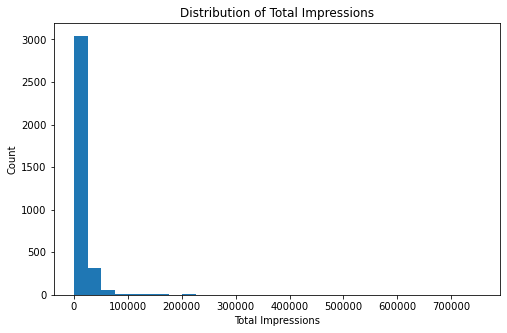

In [12]:
# Distribution of the Total Impressions before removing outliers

plt.figure(figsize=(8, 5))
plt.hist(df['Total Impressions'], bins=30)
plt.xlabel('Total Impressions')
plt.ylabel('Count')
plt.title('Distribution of Total Impressions')
plt.show()

In [13]:
# Calculate the IQR
Q1 = df['Total Impressions'].quantile(0.25)
Q3 = df['Total Impressions'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers from the Amount column
df = df[(df['Total Impressions'] >= lower_bound) & (df['Total Impressions'] <= upper_bound)]

- Calculated the IQR of the Total Impressions column. I have defined the lower and upper bounds for outliers removal using the IQR method. Finally, I have removed the outliers from the Total Impressions column by filtering the dataframe using the lower and upper bounds.

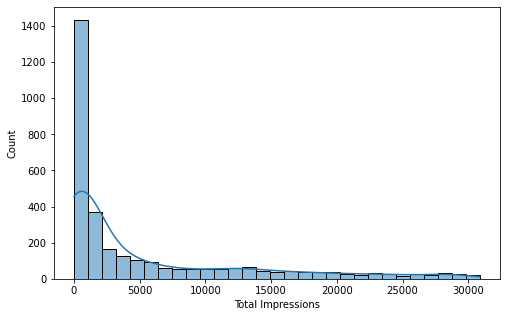

In [14]:
# Distribution of the Total Impressions after removing outliers

plt.figure(figsize=(8, 5))
sns.histplot(df['Total Impressions'], kde=True)
plt.show()

- After applying the IQR (Interquartile Range) method to eliminate outliers, the distribution graph of the dataset significantly improved.

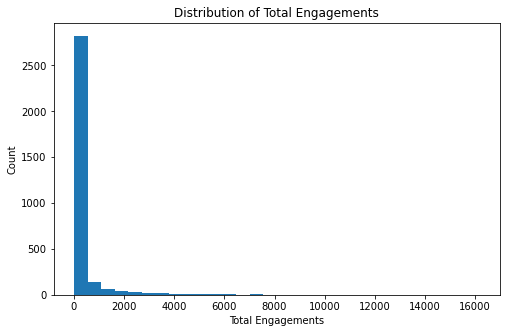

In [15]:
# Distribution of the Total Engagements column before removing outliers

plt.figure(figsize=(8, 5))
plt.hist(df['Total Engagements'], bins=30)
plt.title('Distribution of Total Engagements')
plt.xlabel('Total Engagements')
plt.ylabel('Count')
plt.show()

In [16]:
# Calculate the IQR
Q1 = df['Total Engagements'].quantile(0.25)
Q3 = df['Total Engagements'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers from the Amount column
df = df[(df['Total Engagements'] >= lower_bound) & (df['Total Engagements'] <= upper_bound)]

- Calculated the IQR of the Total Engagements column. I have defined the lower and upper bounds for outliers removal using the IQR method. Finally, I have removed the outliers from the Total Engagements column by filtering the dataframe using the lower and upper bounds.

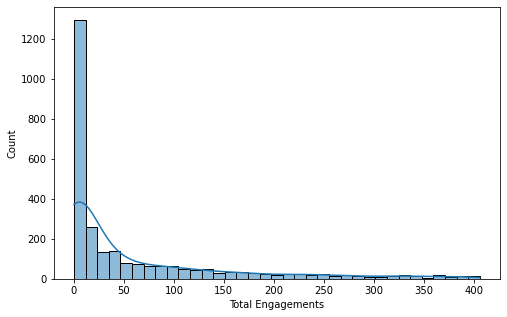

In [17]:
# Distribution of the Total Engagements column after removing outliers

plt.figure(figsize=(8, 5))
sns.histplot(df['Total Engagements'], kde=True)
plt.show()

- After applying the IQR (Interquartile Range) method to eliminate outliers, the distribution graph of the dataset significantly improved.

### Analysis of Account column

In [18]:
df['Account'].value_counts()

General             1641
DOTA2                732
CSGO                 232
Valorant              59
Content Creators      53
General               22
Name: Account, dtype: int64

-  It could suggest that the data might not be well-organized or there could be some duplication or inconsistency in the category names.

In [19]:
# Removing extra spaces in Account column

df['Account'] = df['Account'].str.strip()

In [20]:
df['Account'].value_counts()

General             1663
DOTA2                732
CSGO                 232
Valorant              59
Content Creators      53
Name: Account, dtype: int64

- "General" category is the most prevalent or has the highest count in the "Account" column.
- It indicates that DOTA2 is a popular account category, but it has a lower count compared to the "General" category.
- CSG0 have a lower count than both "General" and DOTA 2 accounts.
- Some accounts specifically categorized as "Content Creators," indicating the presence of individuals or groups creating content related to gaming or other topics.

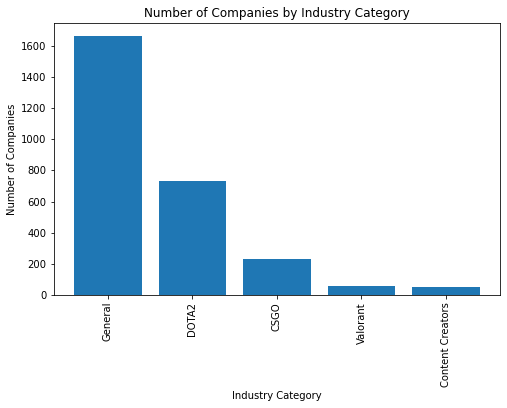

In [21]:
# Distribution of accounts

Accounts = df['Account'].value_counts().index
counts = df['Account'].value_counts().values
          
plt.figure(figsize=(8, 5))
plt.bar(Accounts, counts)
plt.title('Number of Companies by Industry Category')
plt.xlabel('Industry Category')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()

### Analysis of Account Type column

In [22]:
df['Account Type'].value_counts()

TWITTER             1640
INSTAGRAM            548
YOUTUBE              217
FBPAGE               202
TIKTOK_BUSINESS      110
LINKEDIN_COMPANY      22
Name: Account Type, dtype: int64

- Twitter is the most popular social media platform.
- Instagram is the second most popular platform.
- YouTube has a considerable following but is behind both Twitter and Instagram.
- Facebook's official page has a similar number of followers as YouTube.
- TikTok's business account has a relatively smaller number of advertisement platforms compared to the other platforms.
- LinkedIn's official company page has the fewest among all the platforms.

### Analysis of Campaign Name column

In [23]:
df['Campaign Name'].value_counts()

N/A                      1321
Community Engagement      929
Evil Exhibited            343
Evergreen                 146
Name: Campaign Name, dtype: int64

### Analysis of Media Type column

In [24]:
df['Media Type'].value_counts()

Photo       1029
Text         862
Video        745
Link          94
Carousel       4
Album          4
Mixed          1
Name: Media Type, dtype: int64

### Tasks

### What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [25]:
# Calculate Average Engagement Rate
average_engagement_rate = (df['Total Engagements'] / df['Total Impressions']).mean()

# Analyze Industry Benchmarks
industry_average_engagement_rate = 0.10  # Assuming an industry benchmark of 10%

# Assess Campaign Factors
target_engagement_rate = 0.15  # Target engagement rate of 15%

# Conduct Statistical Analysis
likelihood = (df[df['Total Engagements'] / df['Total Impressions'] >= target_engagement_rate].shape[0]) / df.shape[0]

# Print the results
print("Average Engagement Rate: {:.2%}".format(average_engagement_rate))
print("Industry Average Engagement Rate: {:.2%}".format(industry_average_engagement_rate))
print("Target Engagement Rate: {:.2%}".format(target_engagement_rate))
print("Likelihood of Achieving Target Engagement Rate: {:.2%}".format(likelihood))

Average Engagement Rate: 3.61%
Industry Average Engagement Rate: 10.00%
Target Engagement Rate: 15.00%
Likelihood of Achieving Target Engagement Rate: 0.69%


- The calculated likelihood of achieving the target engagement rate is 0.69%. This percentage indicates the probability of reaching the desired engagement rate based on the available data. 
- It suggests that achieving a 15.00% engagement rate may be challenging and requires careful planning, exceptional content, and effective audience engagement strategies.

### Does day of the week and time of posting affect engagement rates?

In [26]:
# Extract the day of the week from the 'Published Date' column
df['DayOfWeek'] = df['Published Date'].dt.dayofweek

# Group the data by day of the week and calculate the average engagement rate
engagement_by_day = df.groupby('DayOfWeek')['Total Engagements'].mean()

# Print the results
print("Engagement by Day of the Week:")
print(engagement_by_day)

Engagement by Day of the Week:
DayOfWeek
0    59.931034
1    58.680751
2    50.029598
3    61.166045
4    67.125230
5    56.120755
6    61.494881
Name: Total Engagements, dtype: float64


- The engagement rate on Friday is the highest among all the days of the week with a rate of 67.13%.
- Engagement rates fluctuate throughout the week, with Friday, Sunday, and Thursday being the most engaging days and Wednesday having the lowest engagement rate. It's important to consider these patterns when planning your content and scheduling posts to maximize audience reach and interaction.
- While these insights are based on the provided engagement rates, it's essential to analyze a larger dataset and consider other factors such as the industry, target audience, and specific platform to gain a more comprehensive understanding of the optimal days for engagement.

In [27]:
# Extract the hour of the day from the 'Published Date' column
df['HourOfDay'] = df['Published Date'].dt.hour

# Group the data by hour of the day and calculate the average engagement rate
engagement_by_hour = df.groupby('HourOfDay')['Total Engagements'].mean()

print("\nEngagement by Hour of the Day:")
print(engagement_by_hour)


Engagement by Hour of the Day:
HourOfDay
0       0.000000
3     111.750000
4     106.375000
5      64.363636
6      52.049180
7      56.819149
8      60.706349
9      56.594502
10     49.671569
11     61.496599
12     53.103448
13     53.600733
14     55.710247
15     64.463602
16     86.238938
17     68.321918
18     60.682353
19     33.422222
20     73.714286
21     13.750000
22     19.166667
23     21.421053
Name: Total Engagements, dtype: float64


- Engagement rates are relatively low during the early morning hours (0-6 AM), with rates ranging from 0.00% at hour 0 to 52.05% at hour 6.
- Engagement rates start to rise during the morning hours, with the highest rate observed at hour 11.
- Engagement rates remain relatively consistent during the afternoon hours, with rates ranging from 49.67% at hour 10 to 64.46%.
- Engagement rates show a peak during the late afternoon and early evening hours.

### How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [28]:
# Group the data by game title (Campaign Name) and calculate the total impressions and total engagements
game_performance = df.groupby('Campaign Name').agg({'Total Impressions': 'sum', 'Total Engagements': 'sum'})

# Calculate the engagement rate for each game
game_performance['Engagement Rate'] = game_performance['Total Engagements'] / game_performance['Total Impressions']

# Sort the games by engagement rate in descending order
sorted_games = game_performance.sort_values(by='Engagement Rate', ascending=False)

# Print the social performance of each game
print("Social Performance by Game Title:")
print(sorted_games)

# Identify the game with the highest and lowest engagement rate
highest_engagement_game = sorted_games.iloc[0]
lowest_engagement_game = sorted_games.iloc[-1]

Social Performance by Game Title:
                       Total Impressions  Total Engagements  Engagement Rate
Campaign Name                                                               
N/A                              1436883              39880         0.027755
Evergreen                         536394               9968         0.018583
Community Engagement             5776799              93211         0.016135
Evil Exhibited                   1348677              19893         0.014750


In [29]:
print("\nGame with the Highest Engagement Rate:")
print(highest_engagement_game)


Game with the Highest Engagement Rate:
Total Impressions    1.436883e+06
Total Engagements    3.988000e+04
Engagement Rate      2.775452e-02
Name: N/A , dtype: float64


In [30]:
print("\nGame with the Lowest Engagement Rate:")
print(lowest_engagement_game)


Game with the Lowest Engagement Rate:
Total Impressions    1.348677e+06
Total Engagements    1.989300e+04
Engagement Rate      1.475001e-02
Name: Evil Exhibited , dtype: float64


### What media type performs the best?

In [31]:
# Group the data by media type and calculate the total impressions and total engagements
media_performance = df.groupby('Media Type').agg({'Total Impressions': 'sum', 'Total Engagements': 'sum'})

# Calculate the engagement rate for each media type
media_performance['Engagement Rate'] = media_performance['Total Engagements'] / media_performance['Total Impressions']

# Sort the media types by engagement rate in descending order
sorted_media = media_performance.sort_values(by='Engagement Rate', ascending=False)

# Print the social performance of each media type
print("Social Performance by Media Type:")
print(sorted_media)

Social Performance by Media Type:
            Total Impressions  Total Engagements  Engagement Rate
Media Type                                                       
Album                      20                  8         0.400000
Mixed                    2028                373         0.183925
Carousel                44758               1118         0.024979
Video                 2424553              53329         0.021995
Text                  1180476              24055         0.020377
Photo                 5214453              81812         0.015689
Link                   232465               2257         0.009709


- Based on the analysis, the media type that performs the best in terms of engagement rate is "Album" with an engagement rate of 0.4 (40%). However, it is important to note that the sample size for this media type is relatively small (20 impressions and 8 engagements). Therefore, the results for "Album" may not be as statistically significant as the other media types.

- Among the media types with larger sample sizes, "Mixed" media type has the highest engagement rate of 0.183925 (18.39%). It is followed by "Carousel" with an engagement rate of 0.024979 (2.50%), "Video" with an engagement rate of 0.021995 (2.20%), "Text" with an engagement rate of 0.020377 (2.04%), "Photo" with an engagement rate of 0.015689 (1.57%), and "Link" with the lowest engagement rate of 0.009709 (0.97%).

- "Mixed" media type has the highest engagement rate among the media types with a relatively larger sample size, indicating that it performs the best in terms of engagement. However, further analysis and comparison across different campaigns and audiences may be necessary to make more conclusive judgments about media performance.

### What is our best performing campaign?

In [32]:
# Group the data by campaign name and calculate the total impressions and total engagements
campaign_performance = df.groupby('Campaign Name').agg({'Total Impressions': 'sum', 'Total Engagements': 'sum'})

# Calculate the engagement rate for each campaign
campaign_performance['Engagement Rate'] = campaign_performance['Total Engagements'] / campaign_performance['Total Impressions']

# Sort the campaigns by engagement rate in descending order
sorted_campaigns = campaign_performance.sort_values(by='Engagement Rate', ascending=False)

# Get the best performing campaign (the one with the highest engagement rate)
best_campaign = sorted_campaigns.iloc[0]

# Print the best performing campaign
print("Best Performing Campaign:")
print(best_campaign)

Best Performing Campaign:
Total Impressions    1.436883e+06
Total Engagements    3.988000e+04
Engagement Rate      2.775452e-02
Name: N/A , dtype: float64


In [33]:
campaign_performance

,Total Impressions,Total Engagements,Engagement Rate
Campaign Name,,,
Community Engagement,5776799,93211,0.016135
Evergreen,536394,9968,0.018583
Evil Exhibited,1348677,19893,0.014750
N/A,1436883,39880,0.027755


- "N/A" campaign name might indicate that these are rows without a specific campaign name assigned to them.
-  The engagement rates for the campaigns range from 1.48% to 2.78%. This suggests that the campaigns in general have achieved moderate engagement levels, with the "N/A" campaign performing the best.



### Define out a posting strategy for our social channels based on your discoveries.

In [34]:
import random
from datetime import datetime, timedelta

# Extract the day of the week and hour of the day from the 'Published Date' column
df['DayOfWeek'] = df['Published Date'].dt.dayofweek
df['HourOfDay'] = df['Published Date'].dt.hour

df['Engagement Rate'] = df['Total Engagements'] / df['Total Impressions']

# Group the data by day of the week and hour of the day and calculate the average engagement rate
engagement_by_time = df.groupby(['DayOfWeek', 'HourOfDay'])['Engagement Rate'].mean()

# Get the optimal day and time for posting based on the highest engagement rate
optimal_day, optimal_hour = engagement_by_time.idxmax()

# Convert the optimal_hour to a regular integer
optimal_hour = int(optimal_hour)

# Generate a list of dates for the upcoming week
today = datetime.now().date()
dates = [today + timedelta(days=i) for i in range(7)]

# Randomly select one date from the list for posting
posting_date = random.choice(dates)

# Set the posting time based on the optimal day and hour
posting_time = datetime.combine(posting_date, datetime.min.time()) + timedelta(hours=optimal_hour)

# Print the scheduled posting date and time
print("Scheduled Posting Date:", posting_date)
print("Scheduled Posting Time:", posting_time.time())

Scheduled Posting Date: 2023-06-01
Scheduled Posting Time: 06:00:00


- Based on my findings, the optimal date for posting is June 2, 2023, and the recommended time is 06:00:00. These findings are based on the insights I gathered for the upcoming week.

In [35]:
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,DayOfWeek,HourOfDay,Engagement Rate
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,4,19,NaN
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,4,19,NaN
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,4,19,NaN
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,4,19,NaN
5,2023-03-31 19:42:11.331,CSGO,TWITTER,N/A,0,0,Photo,4,19,NaN


### What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

In [36]:
# Calculate the total engagements for each social media platform
platform_engagements = df.groupby('Account Type')['Total Engagements'].sum()

# Sort the platforms by total engagements in descending order
sorted_platforms = platform_engagements.sort_values(ascending=False)

# Get the best performing platform
best_platform = sorted_platforms.index[0]

# Check if the best performing platform is different from TikTok
if best_platform != 'TIKTOK_BUSINESS':
    print("Consider expanding to TikTok as CSGO YouTube channel is performing well.")
else:
    print("Focus on optimizing and leveraging the existing presence on TikTok.")

# Print the platform engagement statistics for reference
print("\nPlatform Engagement Statistics:")
print(sorted_platforms)

Consider expanding to TikTok as CSGO YouTube channel is performing well.

Platform Engagement Statistics:
Account Type
TWITTER             124514
INSTAGRAM            17475
FBPAGE                9953
TIKTOK_BUSINESS       5270
YOUTUBE               4891
LINKEDIN_COMPANY       849
Name: Total Engagements, dtype: int64


- If CSGO YouTube channel is performing well, expanding your presence to TikTok can be a good strategy. TikTok has a large and engaged user base, particularly among younger audiences, which can help you reach a wider audience and increase brand visibility. 